# The environment!
There is many ways to setup your work environment. eg. I have miniconda3 installed on levante in my home directory. Then I have installed pyicon https://gitlab.dkrz.de/m300602/pyicon. I use a pyicon predefined environment: pyicon_py39. I extend this environment using pip. 

Here are 3 options how to start a notebook in your environment:
### Option 1:
I use my IDE to tunnel via ssh on levante and execute notebooks or python files on my specified environments (kernels). Correctly installing and connecting the IDE takes time! I planned to write a manual but its not ready yet.

* IDE like Vscode or pycharme eg. https://code.visualstudio.com/

### Option 2:
One option to start a jupyternotebook in this environment without an IDE is https://pad.gwdg.de/9oAvIXuaQlmqNBci43kEyw, see specifically "Using Jupyter Notebook on Mistral". - Be aware that we dont use Mistral anymore but Levante. This option works fine, however the documentation is outdated.

### Option 3:
More convinient will be to follow the instructions of DKRZ using Jupyterhub with your own Kernel:

General: https://docs.dkrz.de/doc/

specific: https://docs.dkrz.de/doc/software%26services/jupyterhub/kernels.html#use-your-own-kernel

If you have questions to this documentation you can always ask support@dkrz.de. They answer quickly!







## Xarray
The example mainly shows xarray and pyicon features. It could be useful to first have a look on xarray documentation and a glance on a tutorial:
https://docs.xarray.dev/en/stable/getting-started-guide/why-xarray.html



## load packages
once the installation and the environment is finished you shoud be able to start a notebook and load the following packages:

In [7]:
# %% 
import sys

#sys.path.append("../../smt_modules")
#sys.path.insert(0, "../../")
import glob, os
import pyicon as pyic
#import smt_modules.all_funcs as eva
#from smt_modules.icon_smt_levels import dzw, dzt, depthc, depthi
#import smt_modules.tools as tools

import pandas as pd
import netCDF4 as nc
from netCDF4 import Dataset
import xarray as xr    
import numpy as np
import datetime

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
ccrs_proj = ccrs.PlateCarree()


# load smt data
some general information

* stored on the native grid
* each time step is stored in one file
## Temperature and Salinity
* stored together in one file, however ech file only contains 16 depth levels
* stored in cell center
## Velocity
* only horizontal velocity is stored
* stored in normal direction of cell face
* a script how to calculate the velocity u,v from normal directions can be found here: https://gitlab.dkrz.de/u241317/submesoscaletelescope/-/blob/main/run_batch_job/v/pp_calc_v_h_xr.py
* vertical velocity is not stored but can be recalculated via diagnostic method eg. https://gitlab.dkrz.de/u241317/submesoscaletelescope/-/blob/main/run_batch_job/w/pp_calc_w_period_new_dask_levante.py
## rel. Vorticity
* only stored at depth 50m 



## Example 1:
### load temperature field, interpolate from native to regular grid

The function I copied in here to load SMT data you can find in my project: 

https://gitlab.dkrz.de/u241317/submesoscaletelescope/-/tree/main/

specifically interesting are all the load_smt_... functions. They can be found here:

https://gitlab.dkrz.de/u241317/submesoscaletelescope/-/blob/main/smt_modules/all_funcs.py

and the following file:

https://gitlab.dkrz.de/u241317/submesoscaletelescope/-/blob/main/smt_modules/icon_smt_levels.py

### functions

In [3]:
# icon_smt_levels.py File
# dz, depth, dz diff, dz ratio
oblev = []
oblev.append([   5.0,     5.0,    5.0,   0.00])
oblev.append([   3.0,     8.0,   -2.0,   0.60])
oblev.append([   3.0,    11.0,    0.0,   1.00])
oblev.append([   3.0,    14.0,    0.0,   1.00])
oblev.append([   3.0,    17.0,    0.0,   1.00])
oblev.append([   3.0,    20.0,    0.0,   1.00])
oblev.append([   3.0,    23.0,    0.0,   1.00])
oblev.append([   3.0,    26.0,    0.0,   1.00])
oblev.append([   3.0,    29.0,    0.0,   1.00])
oblev.append([   3.0,    32.0,    0.0,   1.00])
oblev.append([   3.0,    35.0,    0.0,   1.00])
oblev.append([   3.0,    38.0,    0.0,   1.00])
oblev.append([   3.0,    41.0,    0.0,   1.00])
oblev.append([   3.0,    44.0,    0.0,   1.00])
oblev.append([   3.0,    47.0,    0.0,   1.00])
oblev.append([   3.0,    50.0,    0.0,   1.00])
oblev.append([   3.0,    53.0,    0.0,   1.00])
oblev.append([   3.0,    56.0,    0.0,   1.00])
oblev.append([   3.0,    59.0,    0.0,   1.00])
oblev.append([   3.0,    62.0,    0.0,   1.00])
oblev.append([   3.0,    65.0,    0.0,   1.00])
oblev.append([   3.0,    68.0,    0.0,   1.00])
oblev.append([   3.0,    71.0,    0.0,   1.00])
oblev.append([   3.0,    74.0,    0.0,   1.00])
oblev.append([   3.0,    77.0,    0.0,   1.00])
oblev.append([   3.0,    80.0,    0.0,   1.00])
oblev.append([   3.0,    83.0,    0.0,   1.00])
oblev.append([   3.0,    86.0,    0.0,   1.00])
oblev.append([   3.0,    89.0,    0.0,   1.00])
oblev.append([   3.0,    92.0,    0.0,   1.00])
oblev.append([   3.0,    95.0,    0.0,   1.00])
oblev.append([   3.0,    98.0,    0.0,   1.00])
oblev.append([   3.0,   101.0,    0.0,   1.00])
oblev.append([   3.0,   104.0,    0.0,   1.00])
oblev.append([   3.0,   107.0,    0.0,   1.00])
oblev.append([   3.0,   110.0,    0.0,   1.00])
oblev.append([   3.0,   113.0,    0.0,   1.00])
oblev.append([   3.0,   116.0,    0.0,   1.00])
oblev.append([   3.0,   119.0,    0.0,   1.00])
oblev.append([   3.0,   122.0,    0.0,   1.00])
oblev.append([   3.0,   125.0,    0.0,   1.00])
oblev.append([   3.0,   128.0,    0.0,   1.00])
oblev.append([   3.0,   131.0,    0.0,   1.00])
oblev.append([   3.5,   134.5,    0.5,   1.17])
oblev.append([   3.5,   138.0,    0.0,   1.00])
oblev.append([   3.5,   141.5,    0.0,   1.00])
oblev.append([   3.5,   145.0,    0.0,   1.00])
oblev.append([   3.5,   148.5,    0.0,   1.00])
oblev.append([   3.5,   152.0,    0.0,   1.00])
oblev.append([   4.0,   156.0,    0.5,   1.14])
oblev.append([   4.0,   160.0,    0.0,   1.00])
oblev.append([   4.0,   164.0,    0.0,   1.00])
oblev.append([   4.0,   168.0,    0.0,   1.00])
oblev.append([   4.0,   172.0,    0.0,   1.00])
oblev.append([   4.5,   176.5,    0.5,   1.13])
oblev.append([   4.5,   181.0,    0.0,   1.00])
oblev.append([   4.5,   185.5,    0.0,   1.00])
oblev.append([   4.5,   190.0,    0.0,   1.00])
oblev.append([   5.0,   195.0,    0.5,   1.11])
oblev.append([   5.0,   200.0,    0.0,   1.00])
oblev.append([   5.5,   205.5,    0.5,   1.10])
oblev.append([   6.0,   211.5,    0.5,   1.09])
oblev.append([   6.5,   218.0,    0.5,   1.08])
oblev.append([   7.0,   225.0,    0.5,   1.08])
oblev.append([   7.5,   232.5,    0.5,   1.07])
oblev.append([   8.0,   240.5,    0.5,   1.07])
oblev.append([   8.5,   249.0,    0.5,   1.06])
oblev.append([  10.0,   259.0,    1.5,   1.18])
oblev.append([  11.5,   270.5,    1.5,   1.15])
oblev.append([  13.0,   283.5,    1.5,   1.13])
oblev.append([  14.0,   297.5,    1.0,   1.08])
oblev.append([  15.0,   312.5,    1.0,   1.07])
oblev.append([  15.5,   328.0,    0.5,   1.03])
oblev.append([  16.5,   344.5,    1.0,   1.06])
oblev.append([  17.0,   361.5,    0.5,   1.03])
oblev.append([  18.0,   379.5,    1.0,   1.06])
oblev.append([  19.0,   398.5,    1.0,   1.06])
oblev.append([  20.0,   418.5,    1.0,   1.05])
oblev.append([  21.0,   439.5,    1.0,   1.05])
oblev.append([  22.0,   461.5,    1.0,   1.05])
oblev.append([  23.0,   484.5,    1.0,   1.05])
oblev.append([  24.0,   508.5,    1.0,   1.04])
oblev.append([  26.5,   535.0,    2.5,   1.10])
oblev.append([  29.5,   564.5,    3.0,   1.11])
oblev.append([  32.5,   597.0,    3.0,   1.10])
oblev.append([  36.0,   633.0,    3.5,   1.11])
oblev.append([  40.0,   673.0,    4.0,   1.11])
oblev.append([  44.5,   717.5,    4.5,   1.11])
oblev.append([  49.5,   767.0,    5.0,   1.11])
oblev.append([  55.0,   822.0,    5.5,   1.11])
oblev.append([  61.0,   883.0,    6.0,   1.11])
oblev.append([  67.5,   950.5,    6.5,   1.11])
oblev.append([  75.0,  1025.5,    7.5,   1.11])
oblev.append([  83.5,  1109.0,    8.5,   1.11])
oblev.append([  92.5,  1201.5,    9.0,   1.11])
oblev.append([ 102.5,  1304.0,   10.0,   1.11])
oblev.append([ 114.0,  1418.0,   11.5,   1.11])
oblev.append([ 126.5,  1544.5,   12.5,   1.11])
oblev.append([ 140.5,  1685.0,   14.0,   1.11])
oblev.append([ 156.0,  1841.0,   15.5,   1.11])
oblev.append([ 173.0,  2014.0,   17.0,   1.11])
oblev.append([ 192.0,  2206.0,   19.0,   1.11])
oblev.append([ 213.0,  2419.0,   21.0,   1.11])
oblev.append([ 236.5,  2655.5,   23.5,   1.11])
oblev.append([ 262.5,  2918.0,   26.0,   1.11])
oblev.append([ 291.5,  3209.5,   29.0,   1.11])
oblev.append([ 323.5,  3533.0,   32.0,   1.11])
oblev.append([ 359.0,  3892.0,   35.5,   1.11])
oblev.append([ 398.0,  4290.0,   39.0,   1.11])
oblev.append([ 441.0,  4731.0,   43.0,   1.11])
oblev.append([ 488.5,  5219.5,   47.5,   1.11])
oblev.append([ 540.5,  5760.0,   52.0,   1.11])

nz = len(oblev)
# distance between interfaces
dzw = np.zeros((nz))
# interface depth (vert. vel. points)
depthi = np.zeros((nz+1))
for nn in range(nz):
  dzw[nn] = oblev[nn][0]
  depthi[nn+1] = depthi[nn]+dzw[nn]

# cell center depth (tracer points)
depthc = 0.5*(depthi[1:]+depthi[:-1])
# distance between cell centers
dzt = np.zeros((nz+1))
dzt[1:-1] = depthc[1:]-depthc[:-1]
# 1st level: between 1st interface and 1st cell
dzt[0] = depthc[0]-depthi[0]
# last level: between last cell and last interface
dzt[-1] = depthi[-1]-depthc[-1]


In [4]:
def icon2datetime(icon_dates):
    """
    From: esm_analysis lib
    Convert datetime objects in icon format to python datetime objects.
    :param icon_dates: collection
    :return dates:  pd.DatetimeIndex
    icon_dates i.e
        time = icon2datetime([20011201.5])
    """
    try:
        icon_dates = icon_dates.values
    except AttributeError:
        pass

    try:
        icon_dates = icon_dates[:]
    except TypeError:
        icon_dates = np.array([icon_dates])

    def _convert(icon_date):
        frac_day, date = np.modf(icon_date)
        frac_day *= 60 ** 2 * 24
        date = str(int(date))
        date_str = datetime.datetime.strptime(date, '%Y%m%d')
        td = datetime.timedelta(seconds=int(frac_day.round(0)))
        return date_str + td

    conv = np.vectorize(_convert)
    try:
        out = conv(icon_dates)
    except TypeError:
        out = icon_dates
    if len(out) == 1:
        return pd.DatetimeIndex(out)[0]
    return pd.DatetimeIndex(out)


In [5]:
def load_smt_T():
    layers  =   'sp_001-016' , 'sp_017-032',  'sp_033-048',  'sp_049-064',  'sp_065-080',  'sp_081-096',  'sp_097-112'
    tt = 'a','b','c','d','e','f','g'
    run      = 'ngSMT_tke'
    gname = 'smt'

    ii = 0
    for ll in enumerate(layers):
        ii += 1
        month = '01'
        path_data = f'/work/mh0287/from_Mistral/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
        search_str = f'_T_S_{ll[1]}_2010*.nc' 
        flist1      = np.array(glob.glob(path_data+search_str))
        flist1.sort()
        month = '02'
        path_data = f'/work/mh0287/from_Mistral/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
        flist2      = np.array(glob.glob(path_data+search_str))
        flist2.sort()
        month = '03'
        path_data = f'/work/mh0287/from_Mistral/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
        flist3      = np.array(glob.glob(path_data+search_str))
        flist3.sort()

        flist = [*flist1, *flist2, *flist3]
        flist.sort()

        globals()[f"{tt[ii-1]}"] = xr.open_mfdataset(flist, combine='nested', concat_dim='time', parallel=True, chunks=dict(time=1))

    to = xr.merge([a,b,c,d,e,f,g])

    #select only temperature 
    Tlist = np.empty(depthc.size, dtype='object')
    for dd in range(depthc.size):
            level = "{0:03}".format(dd+1) 
            Tlist[dd]= f'T{level}_sp'

    to = to.assign_coords(time=pd.to_datetime(icon2datetime(to.time)))

    ls = [   to[Tlist[0]],  to[Tlist[1]],  to[Tlist[2]],  to[Tlist[3]],  to[Tlist[4]],  to[Tlist[5]],  to[Tlist[6]],  to[Tlist[7]],  to[Tlist[8]],  to[Tlist[9]],
            to[Tlist[10]], to[Tlist[11]], to[Tlist[12]], to[Tlist[13]], to[Tlist[14]], to[Tlist[15]], to[Tlist[16]], to[Tlist[17]], to[Tlist[18]], to[Tlist[19]],
            to[Tlist[20]], to[Tlist[21]], to[Tlist[22]], to[Tlist[23]], to[Tlist[24]], to[Tlist[25]], to[Tlist[26]], to[Tlist[27]], to[Tlist[28]], to[Tlist[29]],
            to[Tlist[30]], to[Tlist[31]], to[Tlist[32]], to[Tlist[33]], to[Tlist[34]], to[Tlist[35]], to[Tlist[36]], to[Tlist[37]], to[Tlist[38]], to[Tlist[39]],
            to[Tlist[40]], to[Tlist[41]], to[Tlist[42]], to[Tlist[43]], to[Tlist[44]], to[Tlist[45]], to[Tlist[46]], to[Tlist[47]], to[Tlist[48]], to[Tlist[49]],
            to[Tlist[50]], to[Tlist[51]], to[Tlist[52]], to[Tlist[53]], to[Tlist[54]], to[Tlist[55]], to[Tlist[56]], to[Tlist[57]], to[Tlist[58]], to[Tlist[59]],
            to[Tlist[60]], to[Tlist[61]], to[Tlist[62]], to[Tlist[63]], to[Tlist[64]], to[Tlist[65]], to[Tlist[66]], to[Tlist[67]], to[Tlist[68]], to[Tlist[69]],
            to[Tlist[70]], to[Tlist[71]], to[Tlist[72]], to[Tlist[73]], to[Tlist[74]], to[Tlist[75]], to[Tlist[76]], to[Tlist[77]], to[Tlist[78]], to[Tlist[79]],
            to[Tlist[80]], to[Tlist[81]], to[Tlist[82]], to[Tlist[83]], to[Tlist[84]], to[Tlist[85]], to[Tlist[86]], to[Tlist[87]], to[Tlist[88]], to[Tlist[89]],
            to[Tlist[90]], to[Tlist[91]], to[Tlist[92]], to[Tlist[93]], to[Tlist[94]], to[Tlist[95]], to[Tlist[96]], to[Tlist[97]], to[Tlist[98]], to[Tlist[99]],
            to[Tlist[100]], to[Tlist[101]], to[Tlist[102]], to[Tlist[103]], to[Tlist[104]], to[Tlist[105]], to[Tlist[106]], to[Tlist[107]], to[Tlist[108]], to[Tlist[109]],
            to[Tlist[110]], to[Tlist[111]], 
     ]
    TO = xr.concat( ls, dim="depthc")
    TO = TO.assign_coords(depthc=depthc)

    return TO  #to[tList]

In [45]:
def get_lon_lat():
    f = Dataset('/home/m/m300602/work/icon/grids/smt/smt_tgrid.nc', 'r')
    clon = f.variables['clon'][:] * 180./np.pi
    clat = f.variables['clat'][:] * 180./np.pi
    f.close()
    return clon, clat

In [46]:
def load_smt_v():
    """load horizontal velocities from recalculation"""
    search_str = f'pp_calc_v_*.nc' 
    # search_str = f'pp_calc_v_h2010-03-09T05.nc'
    path_data = '/work/mh0033/m300878/smt/v/'
    flist      = np.array(glob.glob(path_data+search_str))
    flist.sort() 
    
    data = xr.open_mfdataset(flist, combine='nested', concat_dim='time', parallel=True, chunks=dict(time=1, depthc=1))
    times = data.time.size
    time0 = np.datetime64('2010-03-09T01:00:00')
    dti  = pd.date_range(time0, periods=times, freq="2h")
    data = data.assign_coords(time=dti)
    clon, clat = get_lon_lat()
    data = data.assign_coords({"clon": ("ncells", clon.data)})
    data = data.assign_coords({"clat": ("ncells", clat.data)})
    return(data)

In [70]:
def load_smt_vn():
    """Load velocity on edges"""
    layers  =   'sp_001-016' , 'sp_017-032',  'sp_033-048',  'sp_049-064',  'sp_065-080',  'sp_081-096',  'sp_097-112'
    tt = 'a','b','c','d','e','f','g'
    run      = 'ngSMT_tke'

    ii = 0
    for ll in enumerate(layers):
        ii += 1
        month = '01'
        path_data = f'/work/mh0287/from_Mistral/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
        search_str = f'_vn_{ll[1]}_2010*.nc' 
        flist1      = np.array(glob.glob(path_data+search_str))
        flist1.sort()
        month = '02'
        path_data = f'/work/mh0287/from_Mistral/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
        flist2      = np.array(glob.glob(path_data+search_str))
        flist2.sort()
        month = '03'
        path_data = f'/work/mh0287/from_Mistral/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
        flist3      = np.array(glob.glob(path_data+search_str))
        flist3.sort()

        flist = [*flist1, *flist2, *flist3]
        flist.sort()

        globals()[f"{tt[ii-1]}"] = xr.open_mfdataset(flist, combine='nested', concat_dim='time', parallel=True, chunks=dict(time=1))

    data = xr.merge([a,b,c,d,e,f,g])
    #merge single arrays indata matrix
    array_list = np.empty(depthc.size, dtype='object')
    for dd in range(depthc.size):
            level = "{0:03}".format(dd+1) 
            array_list[dd]= f'vn{level}_sp'

    data = data.assign_coords(time=pd.to_datetime(icon2datetime(data.time)))

    ls = [   data[array_list[0]],  data[array_list[1]],  data[array_list[2]],  data[array_list[3]],  data[array_list[4]],  data[array_list[5]],  data[array_list[6]],  data[array_list[7]],  data[array_list[8]],  data[array_list[9]],
            data[array_list[10]], data[array_list[11]], data[array_list[12]], data[array_list[13]], data[array_list[14]], data[array_list[15]], data[array_list[16]], data[array_list[17]], data[array_list[18]], data[array_list[19]],
            data[array_list[20]], data[array_list[21]], data[array_list[22]], data[array_list[23]], data[array_list[24]], data[array_list[25]], data[array_list[26]], data[array_list[27]], data[array_list[28]], data[array_list[29]],
            data[array_list[30]], data[array_list[31]], data[array_list[32]], data[array_list[33]], data[array_list[34]], data[array_list[35]], data[array_list[36]], data[array_list[37]], data[array_list[38]], data[array_list[39]],
            data[array_list[40]], data[array_list[41]], data[array_list[42]], data[array_list[43]], data[array_list[44]], data[array_list[45]], data[array_list[46]], data[array_list[47]], data[array_list[48]], data[array_list[49]],
            data[array_list[50]], data[array_list[51]], data[array_list[52]], data[array_list[53]], data[array_list[54]], data[array_list[55]], data[array_list[56]], data[array_list[57]], data[array_list[58]], data[array_list[59]],
            data[array_list[60]], data[array_list[61]], data[array_list[62]], data[array_list[63]], data[array_list[64]], data[array_list[65]], data[array_list[66]], data[array_list[67]], data[array_list[68]], data[array_list[69]],
            data[array_list[70]], data[array_list[71]], data[array_list[72]], data[array_list[73]], data[array_list[74]], data[array_list[75]], data[array_list[76]], data[array_list[77]], data[array_list[78]], data[array_list[79]],
            data[array_list[80]], data[array_list[81]], data[array_list[82]], data[array_list[83]], data[array_list[84]], data[array_list[85]], data[array_list[86]], data[array_list[87]], data[array_list[88]], data[array_list[89]],
            data[array_list[90]], data[array_list[91]], data[array_list[92]], data[array_list[93]], data[array_list[94]], data[array_list[95]], data[array_list[96]], data[array_list[97]], data[array_list[98]], data[array_list[99]],
            data[array_list[100]], data[array_list[101]], data[array_list[102]], data[array_list[103]], data[array_list[104]], data[array_list[105]], data[array_list[106]], data[array_list[107]], data[array_list[108]], data[array_list[109]],
            data[array_list[110]], data[array_list[111]], 
     ]
    DATA = xr.concat( ls, dim="depthc")
    DATA = DATA.assign_coords(depthc=depthc)

    return DATA

### load temperature data

In [8]:
temperature = load_smt_T()
temperature

<xarray.DataArray 'T001_sp' (depthc: 112, time: 984, ncells: 59799625)>
dask.array<concatenate, shape=(112, 984, 59799625), dtype=float32, chunksize=(1, 1, 59799625), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2010-01-09T01:00:00 ... 2010-03-31T23:00:00
  * depthc   (depthc) float64 2.5 6.5 9.5 12.5 ... 4.51e+03 4.975e+03 5.49e+03
Dimensions without coordinates: ncells
Attributes:
    standard_name:                temperature at level 001
    code:                         255
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [9]:
# select data  with integer select
# xarray is not loading the data into memory unless you actually have to calculate it: eg. if you want to plot it
temperature.isel(time=10, depthc=20)

<xarray.DataArray 'T001_sp' (ncells: 59799625)>
dask.array<getitem, shape=(59799625,), dtype=float32, chunksize=(59799625,), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2010-01-09T21:00:00
    depthc   float64 63.5
Dimensions without coordinates: ncells
Attributes:
    standard_name:                temperature at level 001
    code:                         255
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

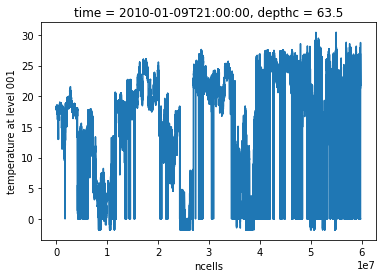

In [10]:
temperature.isel(time=10, depthc=20).plot() # integrate xarray plot function, advantage meta data displyaed, easy and quick

In [11]:
# the above example shows the temperature field of one 2D field. However the data is stored in an array, so we cannot directly plot a 2d map.


### interpolate from native to regular grid

In [12]:
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.nc' # regular grid file
t_interp = pyic.interp_to_rectgrid_xr(temperature.isel(time=10, depthc=10),  fpath_ckdtree=fpath_ckdtree) #minimum input
t_interp


<xarray.DataArray 'T001_sp' (lat: 9000, lon: 18000)>
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [-1.790661, -1.790661, -1.790661, ..., -1.790661, -1.790661,
        -1.790661],
       [-1.790661, -1.790661, -1.790661, ..., -1.790661, -1.790661,
        -1.790661],
       [-1.790079, -1.790079, -1.790079, ..., -1.790079, -1.790079,
        -1.790079]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2010-01-09T21:00:00
    depthc   float64 33.5
  * lat      (lat) float64 -90.0 -89.98 -89.96 -89.94 ... 89.94 89.96 89.98
  * lon      (lon) float64 -180.0 -180.0 -180.0 -179.9 ... 179.9 180.0 180.0
Attributes:
    standard_name:                temperature at level 001
    code:                         255
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [13]:
# interpolate only in region of interest (much faster):
lon_reg_R0    = [-80.5, -55]
lat_reg_R0    = [25, 40]
t_interp = pyic.interp_to_rectgrid_xr(temperature.isel(time=10, depthc=10), lon_reg=lon_reg_R0, lat_reg=lat_reg_R0, fpath_ckdtree=fpath_ckdtree)
t_interp

<xarray.DataArray 'T001_sp' (lat: 750, lon: 1275)>
array([[ 0.      ,  0.      ,  0.      , ..., 23.973457, 23.935337,
        23.958788],
       [ 0.      ,  0.      ,  0.      , ..., 24.022514, 23.952877,
        23.987835],
       [ 0.      ,  0.      ,  0.      , ..., 24.083822, 24.031681,
        24.029202],
       ...,
       [ 0.      ,  0.      ,  0.      , ..., 16.25817 , 16.258102,
        16.257883],
       [ 0.      ,  0.      ,  0.      , ..., 16.267656, 16.268396,
        16.26876 ],
       [ 0.      ,  0.      ,  0.      , ..., 16.277605, 16.278376,
        16.277746]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2010-01-09T21:00:00
    depthc   float64 33.5
  * lat      (lat) float64 25.02 25.04 25.06 25.08 ... 39.94 39.96 39.98 40.0
  * lon      (lon) float64 -80.5 -80.48 -80.46 -80.44 ... -55.06 -55.04 -55.02
Attributes:
    standard_name:                temperature at level 001
    code:                         255
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

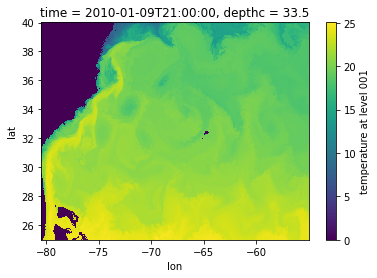

In [14]:
# visualize using xarray gives map with regular data
t_interp.plot()

In [15]:
# transform to numpy array
t_interp.data

array([[ 0.      ,  0.      ,  0.      , ..., 23.973457, 23.935337,
        23.958788],
       [ 0.      ,  0.      ,  0.      , ..., 24.022514, 23.952877,
        23.987835],
       [ 0.      ,  0.      ,  0.      , ..., 24.083822, 24.031681,
        24.029202],
       ...,
       [ 0.      ,  0.      ,  0.      , ..., 16.25817 , 16.258102,
        16.257883],
       [ 0.      ,  0.      ,  0.      , ..., 16.267656, 16.268396,
        16.26876 ],
       [ 0.      ,  0.      ,  0.      , ..., 16.277605, 16.278376,
        16.277746]], dtype=float32)

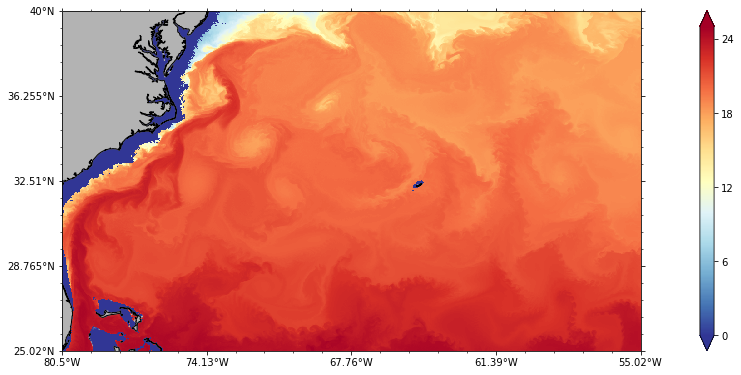

In [16]:
# making a more sophisticated plot using pyicon (here projection is used):
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, fig_size_fac=3, asp=0.5, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(t_interp.lon, t_interp.lat, t_interp.data, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False)

for ax in hca:
    pyic.plot_settings(ax)

### add coordinates to native grid

In [17]:
# there is no longitude latitude information on our temperature dataarray
temperature

<xarray.DataArray 'T001_sp' (depthc: 112, time: 984, ncells: 59799625)>
dask.array<concatenate, shape=(112, 984, 59799625), dtype=float32, chunksize=(1, 1, 59799625), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2010-01-09T01:00:00 ... 2010-03-31T23:00:00
  * depthc   (depthc) float64 2.5 6.5 9.5 12.5 ... 4.51e+03 4.975e+03 5.49e+03
Dimensions without coordinates: ncells
Attributes:
    standard_name:                temperature at level 001
    code:                         255
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [48]:
# now we have latitude and longitude information in our dataset
clon, clat = get_lon_lat()
temperature = temperature.assign_coords({"clon": ("ncells", clon.data)})
temperature = temperature.assign_coords({"clat": ("ncells", clat.data)})
temperature

<xarray.DataArray 'T001_sp' (depthc: 112, time: 984, ncells: 59799625)>
dask.array<concatenate, shape=(112, 984, 59799625), dtype=float32, chunksize=(1, 1, 59799625), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2010-01-09T01:00:00 ... 2010-03-31T23:00:00
  * depthc   (depthc) float64 2.5 6.5 9.5 12.5 ... 4.51e+03 4.975e+03 5.49e+03
    clon     (ncells) float64 -54.21 -54.22 -54.22 ... -71.82 -71.8 -71.82
    clat     (ncells) float64 36.49 36.5 36.49 36.49 ... 9.447 9.437 9.447 9.453
Dimensions without coordinates: ncells
Attributes:
    standard_name:                temperature at level 001
    code:                         255
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [65]:
# select region on native grid 
t_sel = temperature.where((temperature.clon < -60 ) & (temperature.clon > -80 ), drop=True)
t_sel

/home/m/m300878/miniconda3/envs/pyicon_py39/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


<xarray.DataArray 'T001_sp' (depthc: 112, time: 984, ncells: 14317155)>
dask.array<where, shape=(112, 984, 14317155), dtype=float32, chunksize=(1, 1, 14317155), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2010-01-09T01:00:00 ... 2010-03-31T23:00:00
  * depthc   (depthc) float64 2.5 6.5 9.5 12.5 ... 4.51e+03 4.975e+03 5.49e+03
    clon     (ncells) float64 -60.0 -60.0 -60.01 -60.02 ... -71.82 -71.8 -71.82
    clat     (ncells) float64 55.26 55.27 55.26 55.27 ... 9.437 9.447 9.453
Dimensions without coordinates: ncells
Attributes:
    standard_name:                temperature at level 001
    code:                         255
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [66]:
t_sel.clon.min()

<xarray.DataArray 'clon' ()>
array(-79.9999993)

In [67]:
t_sel.clon.max()

<xarray.DataArray 'clon' ()>
array(-60.)

### load velocity data on native grid
since data is stored on cell faces an evaluation is difficult

In [71]:
v = load_smt_vn()
v

<xarray.DataArray 'vn001_sp' (depthc: 112, time: 984, ncells: 89813639)>
dask.array<concatenate, shape=(112, 984, 89813639), dtype=float32, chunksize=(1, 1, 89813639), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2010-01-09T01:00:00 ... 2010-03-31T23:00:00
  * depthc   (depthc) float64 2.5 6.5 9.5 12.5 ... 4.51e+03 4.975e+03 5.49e+03
Dimensions without coordinates: ncells
Attributes:
    standard_name:                vn at level 001
    code:                         255
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  3

### load to cell center interpolated velocity data

here above mentioned script was used to calculate data: so far only for 1-2 weeks calcualted

In [75]:
v_cellcenter = load_smt_v()

know u and v are stored in a Dataset, one can select a variable like

In [76]:
v_cellcenter

<xarray.Dataset>
Dimensions:  (time: 167, depthc: 112, ncells: 59799625)
Coordinates:
  * depthc   (depthc) float32 2.5 6.5 9.5 12.5 ... 4.51e+03 4.975e+03 5.49e+03
  * time     (time) datetime64[ns] 2010-03-09T01:00:00 ... 2010-03-22T21:00:00
    clon     (ncells) float64 -54.21 -54.22 -54.22 ... -71.82 -71.8 -71.82
    clat     (ncells) float64 36.49 36.5 36.49 36.49 ... 9.447 9.437 9.447 9.453
Dimensions without coordinates: ncells
Data variables:
    u        (time, depthc, ncells) float32 dask.array<chunksize=(1, 1, 59799625), meta=np.ndarray>
    v        (time, depthc, ncells) float32 dask.array<chunksize=(1, 1, 59799625), meta=np.ndarray>

In [77]:
v_cellcenter.u

<xarray.DataArray 'u' (time: 167, depthc: 112, ncells: 59799625)>
dask.array<concatenate, shape=(167, 112, 59799625), dtype=float32, chunksize=(1, 1, 59799625), chunktype=numpy.ndarray>
Coordinates:
  * depthc   (depthc) float32 2.5 6.5 9.5 12.5 ... 4.51e+03 4.975e+03 5.49e+03
  * time     (time) datetime64[ns] 2010-03-09T01:00:00 ... 2010-03-22T21:00:00
    clon     (ncells) float64 -54.21 -54.22 -54.22 ... -71.82 -71.8 -71.82
    clat     (ncells) float64 36.49 36.5 36.49 36.49 ... 9.447 9.437 9.447 9.453
Dimensions without coordinates: ncells

In [79]:
#example calculation 
V = np.sqrt(np.power(v_cellcenter.isel(time=150, depthc=20).u,2) + np.power(v_cellcenter.isel(time=150, depthc=20).v,2))
V

<xarray.DataArray (ncells: 59799625)>
dask.array<sqrt, shape=(59799625,), dtype=float32, chunksize=(59799625,), chunktype=numpy.ndarray>
Coordinates:
    depthc   float32 63.5
    time     datetime64[ns] 2010-03-21T13:00:00
    clon     (ncells) float64 -54.21 -54.22 -54.22 ... -71.82 -71.8 -71.82
    clat     (ncells) float64 36.49 36.5 36.49 36.49 ... 9.447 9.437 9.447 9.453
Dimensions without coordinates: ncells

In [80]:
V_interp = pyic.interp_to_rectgrid_xr(V, lon_reg=lon_reg_R0, lat_reg=lat_reg_R0, fpath_ckdtree=fpath_ckdtree)


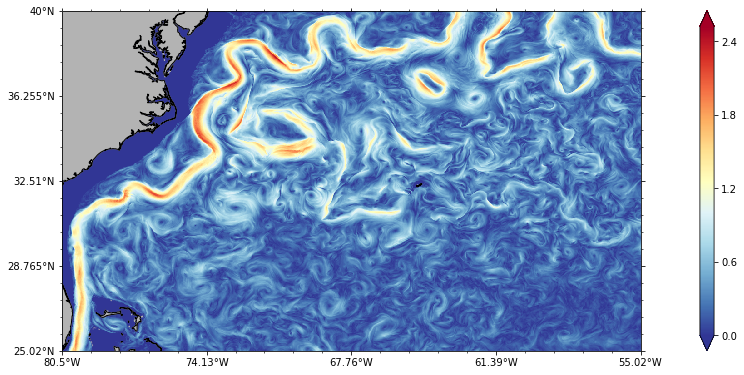

In [81]:
#visualize
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, fig_size_fac=3, asp=0.5, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(V_interp.lon, V_interp.lat, V_interp.data, ax=ax, cax=cax, transform=ccrs_proj, rasterized=False)

for ax in hca:
    pyic.plot_settings(ax)